# Visualization of a smooth function discriminator
According to the paper: "asdf", a smooth function discriminator following the XXX theorem is described. This script generates a simple 1D visualization of the underlying principle and refers to chapter XXX in the Master thesis: "asdf"

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
%matplotlib inline

import numpy as np
import math

from scipy import ndimage
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d

## Separation areas: 0 and 1

Caution: This is a visualization and not a mathematically smooth function!

In [6]:
#Zero
zero_y = np.zeros(90)
zero_x = np.linspace(-10,-1,90)

one_y = np.ones(90)
one_x = np.linspace(1,10,90)

if len(zero_x)==len(zero_y): 
    print('Number of elements 0: {}'.format(len(zero_x)))
else: 
    print('Error: Check elements in 0 array!')
    
if len(one_x)==len(one_y): 
    print('Number of elements 1: {}'.format(len(one_x)))
else: 
    print('Error: Check elements in 1 array!')

Number of elements 0: 90
Number of elements 1: 90


In [25]:
# Define a smooth function from 0...10, excluding 10
smooth_x_pos = np.linspace(0,10,100, endpoint = False)
# e^(-x)/e
smooth_y_pos = np.ones(100)-np.exp(-smooth_x_pos[:])*(1/np.exp(1))
smooth_x_pos = smooth_x_pos/10

smooth_x_neg = np.linspace(0,-10,100, endpoint = False)
smooth_y_neg = np.zeros(100)+np.exp(smooth_x_neg[:])*(1/np.exp(1))
smooth_x_neg = smooth_x_neg/10

print('Number of elements in smooth function part: {}'.format(len(smooth_x_pos)))
print('Element range from {} to {}'.format(min(smooth_x_pos), max(smooth_x_pos)))

Number of elements in smooth function part: 100
Element range from 0.0 to 0.99


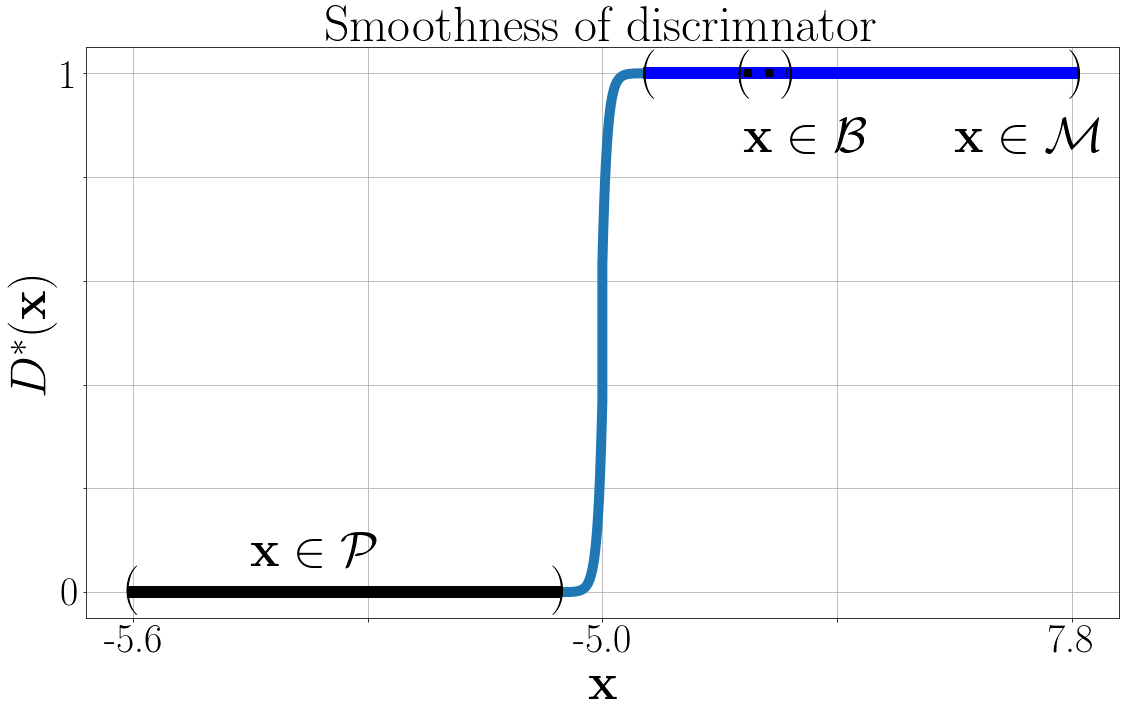

In [57]:
# Define figure with size and LaTex style 
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.grid(True)

# Get figure plot
ax = fig.gca()

# Plot the surface with x and y array and a strong linewidth
# [::-1] flips an array the other way around! -10...-1, -0.99... -0., 0. ... 0.99,1...10
#ax.plot(np.concatenate((-one_x[::-1], -smooth_x_pos[::-1], smooth_x_pos, one_x), axis=0), 
 #       np.concatenate((-one_y[::-1], -smooth_y_pos[::-1], smooth_y_pos, one_y), axis=0), 
  #      linewidth = 10)

ax.plot(np.concatenate((zero_x, smooth_x_neg[::-1], smooth_x_pos, one_x), axis=0), 
        np.concatenate((zero_y, smooth_y_neg[::-1], smooth_y_pos, one_y), axis=0), 
        linewidth = 10)

# Subset P - black
ax.text(-7.5,0.05,r'$\mathbf{x}\in \mathcal{P}$', fontsize=50)
ax.text(-1.07,-0.02,')', fontsize=50)
ax.text(-10.15,-0.02,'(', fontsize=50)
ax.plot(zero_x[::-1], -zero_y[::-1], linewidth = 12, color = 'black')

# Subset M - blue
ax.text(7.5,0.85,r'$\mathbf{x}\in \mathcal{M}$', fontsize=50)
ax.text(0.86,0.975,'(', fontsize=50)
ax.text(9.95,0.975,')', fontsize=50)
ax.plot(one_x, one_y, linewidth = 12, color = 'blue')

# Subset B in subset M
ax.text(3,0.85,r'$\mathbf{x}\in \mathcal{B}$', fontsize=50)
ax.text(2.9,0.975,'(', fontsize=50)
ax.text(3.8,0.975,')', fontsize=50)
ax.plot(one_x[20:30], one_y[20:30], linewidth = 8, color = 'black', linestyle = ':')

# Labels - Ideal discriminator: D*
plt.tick_params(axis='both', which='major', labelsize=40)
ax.set_ylabel(r'$D^*(\mathbf{x})$', fontsize=50)
ax.set_xlabel(r'$\mathbf{x} $', fontsize=50)

# Set labels manually
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '-5.6'
labels[3] = '-5.0'
labels[5] = '-3.0'
labels[6] = '0.0'
labels[-2] = '7.8'
ax.set_xticklabels(labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels[1] = '0'
labels[-2] = '1'
ax.set_yticklabels(labels)

# Title as part of figure
plt.title(r"Smoothness of discrimnator", fontsize=50, color='black')

# Show current plot
plt.show()

In [27]:
# Save current figure as eps file in working directory of this Jupyter notebook
fig.savefig('smoothness_discriminator.eps', format='eps', dpi=1000, bbox_inches = 'tight')